In [1]:
import psutil
import os
process = psutil.Process(os.getpid())
print(f'{process.memory_info().rss} bytes')
print(f'{process.memory_info().rss/(1024*1024)} Mbytes')

60825600 bytes
58.0078125 Mbytes


In [1]:
import torch
from dataset.utils import *
from losses import *
from utils import *
from net.resnet import *
from net.googlenet import *
from net.bn_inception import *
from net.pfe import *
from train import train_model
import pytorch_metric_learning as pml

In [2]:
batch_size = 32
def redefine_train_parameters():
    global device, epochs, learning_rate, loss_lr, num_classes, embedding_size
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    epochs = 20
    learning_rate = 0.001
    loss_lr = 0.01
    num_classes = get_num_classes(train_dataset)
    embedding_size = 512

In [4]:
train_dataset = make_dataset('LFWCustom', split='train', max_classes=50, min_samples=20, image_size=100)
test_dataset = make_dataset('LFWCustom', split='test', max_classes=50, min_samples=20, image_size=100)
train_loader = load_dataset(train_dataset, batch_size, shuffle=True)
test_loader = load_dataset(test_dataset, batch_size, shuffle=False)
redefine_train_parameters()

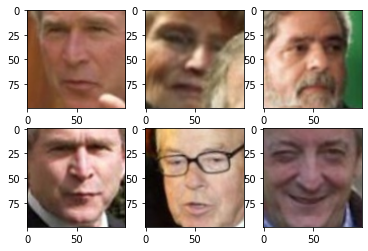

In [5]:
display_images(train_loader, h=2,w=3)

In [6]:
model = Resnet50(embedding_size=embedding_size, pretrained=True)
model.to(device)
# evaluate_accuracy(model, test_loader)

Resnet50(
  (model): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
          (

In [7]:
evaluate_cos(model, test_loader)

100%|██████████| 26/26 [00:26<00:00,  1.01s/it]


R@1 : 26.027
R@2 : 37.111
R@4 : 49.191
R@8 : 62.765
R@16 : 72.727
R@32 : 81.943


[0.2602739726027397,
 0.3711083437110834,
 0.4919053549190536,
 0.6276463262764632,
 0.7272727272727273,
 0.8194271481942715]

OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


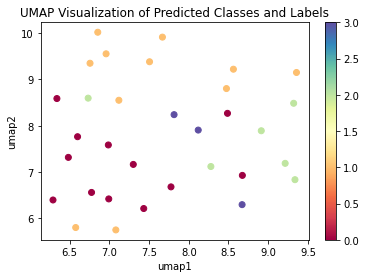

In [8]:
visualize_umap(model, test_loader)

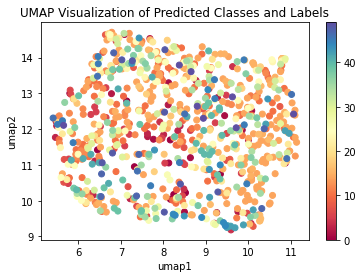

In [9]:
visualize_umap(model, test_loader, mode=2)

In [10]:
model = train_model(model_name='resnet50',
                    loss_func_name='proxy_anchor',
                    num_classes=num_classes,
                    dataloader=train_loader,
                    epochs=epochs,
                    learning_rate=learning_rate,
                    save_path='./saved_models/resnet50_lfw50_proxy.ptm',
                    verbose=2)

Step: [10/53] Epoch [1/20] Loss: 1.8384 Time: 9.9341
Step: [20/53] Epoch [1/20] Loss: 3.5804 Time: 19.4351
Step: [30/53] Epoch [1/20] Loss: 5.2460 Time: 28.9650
Step: [40/53] Epoch [1/20] Loss: 6.7982 Time: 38.6743
Step: [50/53] Epoch [1/20] Loss: 8.3167 Time: 48.1468
Step: [53/53] Epoch [1/20] Loss: 8.7691 Time: 50.3867
Epoch [1/20] Loss: 8.7691 Time: 50.3872 Learning rate: 0.001
Step: [10/53] Epoch [2/20] Loss: 1.4593 Time: 59.8614
Step: [20/53] Epoch [2/20] Loss: 2.8657 Time: 69.3628
Step: [30/53] Epoch [2/20] Loss: 4.2166 Time: 79.0660
Step: [40/53] Epoch [2/20] Loss: 5.6281 Time: 88.6381
Step: [50/53] Epoch [2/20] Loss: 6.9462 Time: 98.0428
Step: [53/53] Epoch [2/20] Loss: 7.3042 Time: 100.2380
Epoch [2/20] Loss: 7.3042 Time: 100.2385 Learning rate: 0.001
Step: [10/53] Epoch [3/20] Loss: 1.2948 Time: 109.6941
Step: [20/53] Epoch [3/20] Loss: 2.5473 Time: 119.4051
Step: [30/53] Epoch [3/20] Loss: 3.7487 Time: 128.9205
Step: [40/53] Epoch [3/20] Loss: 4.9673 Time: 138.4821
Step: [50

In [11]:
model = torch.load('./saved_models/resnet50_lfw50_proxy.ptm')
# evaluate_accuracy(model, test_loader)

In [12]:
evaluate_cos(model, test_loader)

100%|██████████| 26/26 [00:23<00:00,  1.12it/s]


R@1 : 87.422
R@2 : 90.037
R@4 : 91.407
R@8 : 92.777
R@16 : 94.645
R@32 : 96.264


[0.8742216687422167,
 0.900373599003736,
 0.9140722291407223,
 0.9277708592777086,
 0.9464508094645081,
 0.962640099626401]

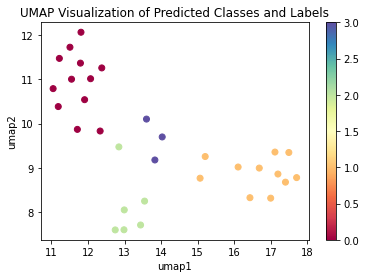

In [13]:
visualize_umap(model, test_loader)

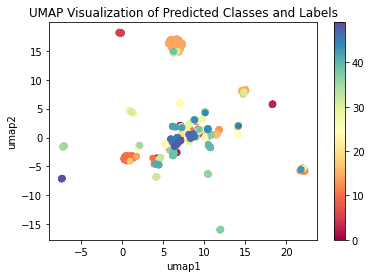

In [14]:
visualize_umap(model, test_loader, mode=2)

In [15]:
train_dataset = make_dataset('LFWCustom', split='train', max_classes=50, min_samples=20, image_size=100, hist='v')
test_dataset = make_dataset('LFWCustom', split='test', max_classes=50, min_samples=20, image_size=100, hist='v')
train_loader = load_dataset(train_dataset, batch_size, shuffle=True)
test_loader = load_dataset(test_dataset, batch_size, shuffle=False)
redefine_train_parameters()

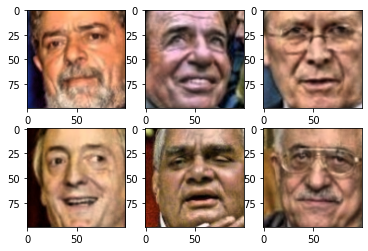

In [16]:
display_images(train_loader, h=2,w=3)

In [17]:
model = train_model(model_name='resnet50',
                    loss_func_name='proxy_anchor',
                    num_classes=num_classes,
                    dataloader=train_loader,
                    epochs=epochs,
                    learning_rate=learning_rate,
                    save_path='./saved_models/resnet50_lfw50_adapthist_proxy.ptm',
                    verbose=2)

Step: [10/53] Epoch [1/20] Loss: 1.8330 Time: 11.9337
Step: [20/53] Epoch [1/20] Loss: 3.5914 Time: 23.8584
Step: [30/53] Epoch [1/20] Loss: 5.2463 Time: 35.8595
Step: [40/53] Epoch [1/20] Loss: 6.8483 Time: 47.8360
Step: [50/53] Epoch [1/20] Loss: 8.4330 Time: 59.8226
Step: [53/53] Epoch [1/20] Loss: 8.8809 Time: 62.5597
Epoch [1/20] Loss: 8.8809 Time: 62.5607 Learning rate: 0.001
Step: [10/53] Epoch [2/20] Loss: 1.4344 Time: 74.7409
Step: [20/53] Epoch [2/20] Loss: 2.8265 Time: 86.7008
Step: [30/53] Epoch [2/20] Loss: 4.2607 Time: 98.6534
Step: [40/53] Epoch [2/20] Loss: 5.6474 Time: 110.8024
Step: [50/53] Epoch [2/20] Loss: 7.0629 Time: 122.7011
Step: [53/53] Epoch [2/20] Loss: 7.4620 Time: 125.4739
Epoch [2/20] Loss: 7.4620 Time: 125.4742 Learning rate: 0.001
Step: [10/53] Epoch [3/20] Loss: 1.3109 Time: 137.4571
Step: [20/53] Epoch [3/20] Loss: 2.6536 Time: 149.5463
Step: [30/53] Epoch [3/20] Loss: 3.8925 Time: 161.5116
Step: [40/53] Epoch [3/20] Loss: 5.0929 Time: 173.4910
Step: 

In [18]:
model = torch.load('./saved_models/resnet50_lfw50_adapthist_proxy.ptm')
# evaluate_accuracy(model, test_loader)

In [19]:
evaluate_cos(model, test_loader)

100%|██████████| 26/26 [00:29<00:00,  1.13s/it]


R@1 : 86.177
R@2 : 89.041
R@4 : 91.407
R@8 : 93.524
R@16 : 95.392
R@32 : 97.634


[0.8617683686176837,
 0.8904109589041096,
 0.9140722291407223,
 0.9352428393524284,
 0.9539227895392279,
 0.9763387297633873]

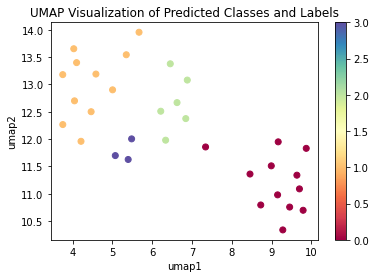

In [20]:
visualize_umap(model, test_loader)

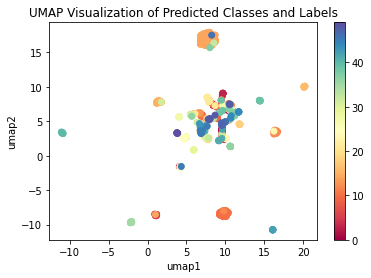

In [21]:
visualize_umap(model, test_loader, mode=2)

In [22]:
train_dataset = make_dataset('LFWCustom', split='train', max_classes=50, min_samples=20, image_size=100, median=True)
test_dataset = make_dataset('LFWCustom', split='test', max_classes=50, min_samples=20, image_size=100, median=True)
train_loader = load_dataset(train_dataset, batch_size, shuffle=True)
test_loader = load_dataset(test_dataset, batch_size, shuffle=False)
redefine_train_parameters()

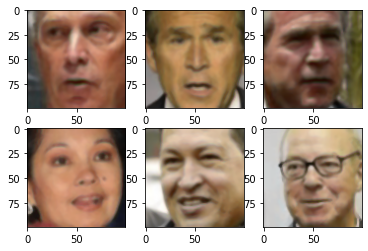

In [23]:
display_images(train_loader, h=2,w=3)

In [24]:
model = train_model(model_name='resnet50',
                    loss_func_name='proxy_anchor',
                    num_classes=num_classes,
                    dataloader=train_loader,
                    epochs=epochs,
                    learning_rate=learning_rate,
                    save_path='./saved_models/resnet50_lfw50_median_proxy.ptm',
                    verbose=2)

Step: [10/53] Epoch [1/20] Loss: 1.8537 Time: 12.4236
Step: [20/53] Epoch [1/20] Loss: 3.5353 Time: 25.0551
Step: [30/53] Epoch [1/20] Loss: 5.2433 Time: 37.5700
Step: [40/53] Epoch [1/20] Loss: 6.9299 Time: 50.0549
Step: [50/53] Epoch [1/20] Loss: 8.5224 Time: 62.7487
Step: [53/53] Epoch [1/20] Loss: 8.9594 Time: 65.6366
Epoch [1/20] Loss: 8.9594 Time: 65.6370 Learning rate: 0.001
Step: [10/53] Epoch [2/20] Loss: 1.4847 Time: 78.1021
Step: [20/53] Epoch [2/20] Loss: 2.9826 Time: 90.7687
Step: [30/53] Epoch [2/20] Loss: 4.4133 Time: 103.2888
Step: [40/53] Epoch [2/20] Loss: 5.8887 Time: 115.8116
Step: [50/53] Epoch [2/20] Loss: 7.2870 Time: 128.5188
Step: [53/53] Epoch [2/20] Loss: 7.7010 Time: 131.4116
Epoch [2/20] Loss: 7.7010 Time: 131.4120 Learning rate: 0.001
Step: [10/53] Epoch [3/20] Loss: 1.4422 Time: 143.8960
Step: [20/53] Epoch [3/20] Loss: 2.8152 Time: 156.5945
Step: [30/53] Epoch [3/20] Loss: 4.1437 Time: 169.0603
Step: [40/53] Epoch [3/20] Loss: 5.4463 Time: 181.5299
Step:

In [25]:
model = torch.load('./saved_models/resnet50_lfw50_median_proxy.ptm')
# evaluate_accuracy(model, test_loader)

In [26]:
evaluate_cos(model, test_loader)

100%|██████████| 26/26 [00:30<00:00,  1.18s/it]


R@1 : 88.045
R@2 : 90.162
R@4 : 91.905
R@8 : 93.773
R@16 : 95.766
R@32 : 98.132


[0.8804483188044832,
 0.9016189290161893,
 0.9190535491905355,
 0.937733499377335,
 0.9576587795765878,
 0.9813200498132005]

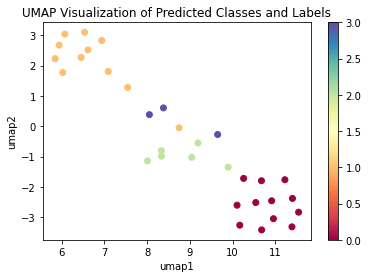

In [27]:
visualize_umap(model, test_loader)

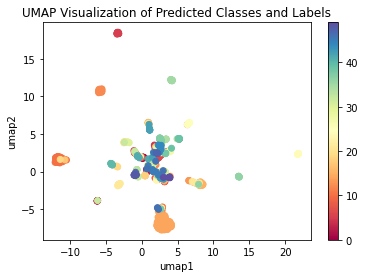

In [28]:
visualize_umap(model, test_loader, mode=2)

In [29]:
train_dataset = make_dataset('LFWCustom', split='train', max_classes=50, min_samples=20, image_size=100, hist='v', median=True)
test_dataset = make_dataset('LFWCustom', split='test', max_classes=50, min_samples=20, image_size=100, hist='v', median=True)
train_loader = load_dataset(train_dataset, batch_size, shuffle=True)
test_loader = load_dataset(test_dataset, batch_size, shuffle=False)
redefine_train_parameters()

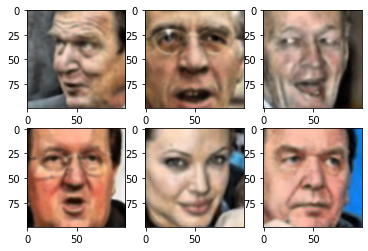

In [30]:
display_images(train_loader, h=2,w=3)

In [31]:
model = train_model(model_name='resnet50',
                    loss_func_name='proxy_anchor',
                    num_classes=num_classes,
                    dataloader=train_loader,
                    epochs=epochs,
                    learning_rate=learning_rate,
                    save_path='./saved_models/resnet50_lfw50_adapthist_median_proxy.ptm',
                    verbose=2)

Step: [10/53] Epoch [1/20] Loss: 1.7846 Time: 15.3080
Step: [20/53] Epoch [1/20] Loss: 3.5552 Time: 30.3082
Step: [30/53] Epoch [1/20] Loss: 5.2436 Time: 45.5652
Step: [40/53] Epoch [1/20] Loss: 6.8459 Time: 60.6039
Step: [50/53] Epoch [1/20] Loss: 8.4517 Time: 75.8602
Step: [53/53] Epoch [1/20] Loss: 8.9045 Time: 79.3581
Epoch [1/20] Loss: 8.9045 Time: 79.3588 Learning rate: 0.001
Step: [10/53] Epoch [2/20] Loss: 1.4479 Time: 94.4069
Step: [20/53] Epoch [2/20] Loss: 2.8137 Time: 109.4116
Step: [30/53] Epoch [2/20] Loss: 4.1674 Time: 124.6225
Step: [40/53] Epoch [2/20] Loss: 5.5000 Time: 139.6184
Step: [50/53] Epoch [2/20] Loss: 6.8969 Time: 154.8790
Step: [53/53] Epoch [2/20] Loss: 7.2910 Time: 158.4141
Epoch [2/20] Loss: 7.2910 Time: 158.4144 Learning rate: 0.001
Step: [10/53] Epoch [3/20] Loss: 1.3085 Time: 173.4849
Step: [20/53] Epoch [3/20] Loss: 2.6133 Time: 188.6834
Step: [30/53] Epoch [3/20] Loss: 3.8612 Time: 203.6995
Step: [40/53] Epoch [3/20] Loss: 5.1072 Time: 218.9201
Step

In [32]:
model = torch.load('./saved_models/resnet50_lfw50_adapthist_median_proxy.ptm')
# evaluate_accuracy(model, test_loader)

In [33]:
evaluate_cos(model, test_loader)

100%|██████████| 26/26 [00:37<00:00,  1.43s/it]


R@1 : 88.667
R@2 : 91.034
R@4 : 92.653
R@8 : 94.521
R@16 : 96.389
R@32 : 97.260


[0.8866749688667497,
 0.9103362391033624,
 0.9265255292652553,
 0.9452054794520548,
 0.9638854296388543,
 0.9726027397260274]

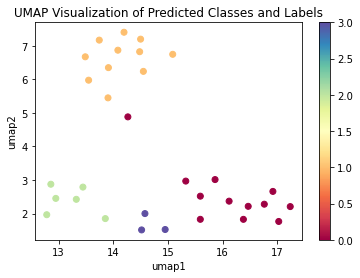

In [34]:
visualize_umap(model, test_loader)

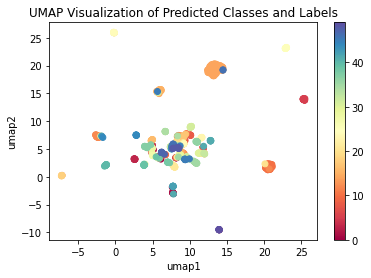

In [35]:
visualize_umap(model, test_loader, mode=2)

In [36]:
train_dataset = make_dataset('LFWCustom', split='train', max_classes=50, min_samples=20, image_size=100, hist='v', median_before=True)
test_dataset = make_dataset('LFWCustom', split='test', max_classes=50, min_samples=20, image_size=100, hist='v', median_before=True)
train_loader = load_dataset(train_dataset, batch_size, shuffle=True)
test_loader = load_dataset(test_dataset, batch_size, shuffle=False)
redefine_train_parameters()

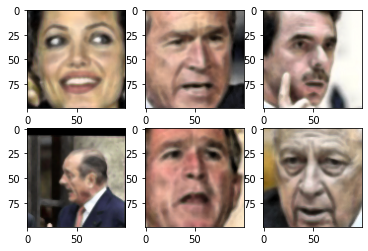

In [37]:
display_images(train_loader, h=2,w=3)

In [38]:
model = train_model(model_name='resnet50',
                    loss_func_name='proxy_anchor',
                    num_classes=num_classes,
                    dataloader=train_loader,
                    epochs=epochs,
                    learning_rate=learning_rate,
                    save_path='./saved_models/resnet50_lfw50_median_adapthist_proxy.ptm',
                    verbose=2)

Step: [10/53] Epoch [1/20] Loss: 1.8321 Time: 15.0946
Step: [20/53] Epoch [1/20] Loss: 3.5492 Time: 29.9259
Step: [30/53] Epoch [1/20] Loss: 5.2396 Time: 44.9522
Step: [40/53] Epoch [1/20] Loss: 6.8652 Time: 59.8233
Step: [50/53] Epoch [1/20] Loss: 8.4496 Time: 74.7299
Step: [53/53] Epoch [1/20] Loss: 8.8694 Time: 78.3680
Epoch [1/20] Loss: 8.8694 Time: 78.3686 Learning rate: 0.001
Step: [10/53] Epoch [2/20] Loss: 1.4290 Time: 93.2803
Step: [20/53] Epoch [2/20] Loss: 2.9203 Time: 108.1579
Step: [30/53] Epoch [2/20] Loss: 4.2770 Time: 123.2373
Step: [40/53] Epoch [2/20] Loss: 5.6798 Time: 138.1142
Step: [50/53] Epoch [2/20] Loss: 7.0735 Time: 153.2260
Step: [53/53] Epoch [2/20] Loss: 7.4408 Time: 156.7230
Epoch [2/20] Loss: 7.4408 Time: 156.7235 Learning rate: 0.001
Step: [10/53] Epoch [3/20] Loss: 1.2659 Time: 171.5323
Step: [20/53] Epoch [3/20] Loss: 2.6396 Time: 186.4823
Step: [30/53] Epoch [3/20] Loss: 3.9526 Time: 201.5933
Step: [40/53] Epoch [3/20] Loss: 5.2178 Time: 216.4840
Step

In [39]:
model = torch.load('./saved_models/resnet50_lfw50_median_adapthist_proxy.ptm')
# evaluate_accuracy(model, test_loader)

In [40]:
evaluate_cos(model, test_loader)

100%|██████████| 26/26 [00:36<00:00,  1.42s/it]


R@1 : 88.294
R@2 : 91.407
R@4 : 92.902
R@8 : 94.894
R@16 : 96.264
R@32 : 97.758


[0.8829389788293898,
 0.9140722291407223,
 0.9290161892901619,
 0.9489414694894147,
 0.962640099626401,
 0.9775840597758406]

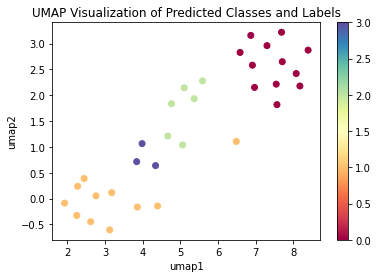

In [41]:
visualize_umap(model, test_loader)

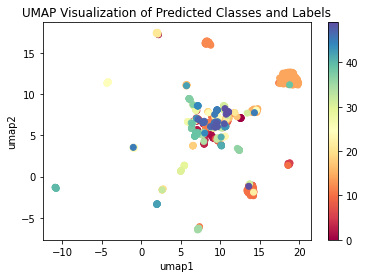

In [42]:
visualize_umap(model, test_loader, mode=2)

In [22]:
train_dataset = make_dataset('LFWCustom', split='train', max_classes=50, min_samples=20, image_size=100, unsharp=True)
test_dataset = make_dataset('LFWCustom', split='test', max_classes=50, min_samples=20, image_size=100, unsharp=True)
train_loader = load_dataset(train_dataset, batch_size, shuffle=True)
test_loader = load_dataset(test_dataset, batch_size, shuffle=False)
redefine_train_parameters()

/opt/conda/lib/python3.8/site-packages/skimage/filters/_unsharp_mask.py:11: FutureWarning: Automatic detection of the color channel was deprecated in v0.19, and `channel_axis=None` will be the new default in v0.22. Set `channel_axis=-1` explicitly to silence this warning.
  blurred = gaussian(image, sigma=radius, mode='reflect')


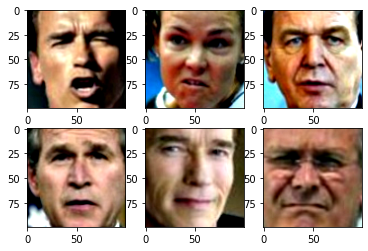

In [23]:
display_images(train_loader, h=2,w=3)

In [24]:
model = train_model(model_name='resnet50',
                    loss_func_name='proxy_anchor',
                    num_classes=num_classes,
                    dataloader=train_loader,
                    epochs=epochs,
                    learning_rate=learning_rate,
                    save_path='./saved_models/resnet50_lfw50_unsharp_proxy.ptm',
                    verbose=2)

Step: [10/53] Epoch [1/20] Loss: 1.8626 Time: 10.9084
Step: [20/53] Epoch [1/20] Loss: 3.6049 Time: 21.8995
Step: [30/53] Epoch [1/20] Loss: 5.3124 Time: 32.9752
Step: [40/53] Epoch [1/20] Loss: 6.8420 Time: 43.8660
Step: [50/53] Epoch [1/20] Loss: 8.4045 Time: 54.7181
Step: [53/53] Epoch [1/20] Loss: 8.8022 Time: 57.2265
Epoch [1/20] Loss: 8.8022 Time: 57.2267 Learning rate: 0.001
Step: [10/53] Epoch [2/20] Loss: 1.3855 Time: 68.2496
Step: [20/53] Epoch [2/20] Loss: 2.7715 Time: 79.1097
Step: [30/53] Epoch [2/20] Loss: 4.1108 Time: 89.9914
Step: [40/53] Epoch [2/20] Loss: 5.4407 Time: 101.0640
Step: [50/53] Epoch [2/20] Loss: 6.8421 Time: 111.8380
Step: [53/53] Epoch [2/20] Loss: 7.2152 Time: 114.3607
Epoch [2/20] Loss: 7.2152 Time: 114.3609 Learning rate: 0.001
Step: [10/53] Epoch [3/20] Loss: 1.2480 Time: 125.2161
Step: [20/53] Epoch [3/20] Loss: 2.5300 Time: 136.2593
Step: [30/53] Epoch [3/20] Loss: 3.7603 Time: 147.0835
Step: [40/53] Epoch [3/20] Loss: 4.9095 Time: 157.9025
Step: 

In [25]:
model = torch.load('./saved_models/resnet50_lfw50_unsharp_proxy.ptm')
# evaluate_accuracy(model, test_loader)

In [26]:
evaluate_cos(model, test_loader)

100%|██████████| 26/26 [00:26<00:00,  1.02s/it]


R@1 : 87.920
R@2 : 91.158
R@4 : 92.279
R@8 : 93.649
R@16 : 96.015
R@32 : 97.509


[0.8792029887920298,
 0.9115815691158157,
 0.9227895392278954,
 0.9364881693648817,
 0.9601494396014943,
 0.975093399750934]

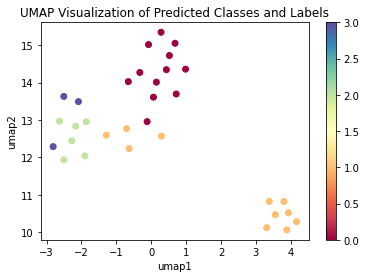

In [27]:
visualize_umap(model, test_loader)

/opt/conda/lib/python3.8/site-packages/skimage/filters/_unsharp_mask.py:11: FutureWarning: Automatic detection of the color channel was deprecated in v0.19, and `channel_axis=None` will be the new default in v0.22. Set `channel_axis=-1` explicitly to silence this warning.
  blurred = gaussian(image, sigma=radius, mode='reflect')


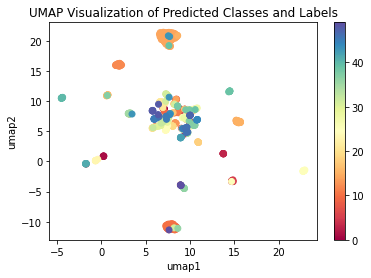

In [28]:
visualize_umap(model, test_loader, mode=2)

In [50]:
train_dataset = make_dataset('LFWCustom', split='train', max_classes=50, min_samples=20, image_size=100, unsharp_after=True, median=True)
test_dataset = make_dataset('LFWCustom', split='test', max_classes=50, min_samples=20, image_size=100, unsharp_after=True, median=True)
train_loader = load_dataset(train_dataset, batch_size, shuffle=True)
test_loader = load_dataset(test_dataset, batch_size, shuffle=False)
redefine_train_parameters()

/opt/conda/lib/python3.8/site-packages/skimage/filters/_unsharp_mask.py:11: FutureWarning: Automatic detection of the color channel was deprecated in v0.19, and `channel_axis=None` will be the new default in v0.22. Set `channel_axis=-1` explicitly to silence this warning.
  blurred = gaussian(image, sigma=radius, mode='reflect')


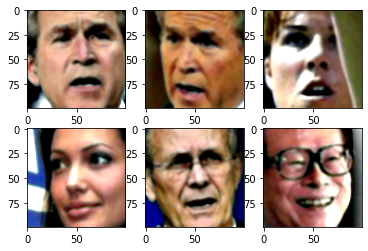

In [51]:
display_images(train_loader, h=2,w=3)

In [52]:
model = train_model(model_name='resnet50',
                    loss_func_name='proxy_anchor',
                    num_classes=num_classes,
                    dataloader=train_loader,
                    epochs=epochs,
                    learning_rate=learning_rate,
                    save_path='./saved_models/resnet50_lfw50_median_unsharp_proxy.ptm',
                    verbose=2)

Step: [10/53] Epoch [1/20] Loss: 1.8991 Time: 13.8311
Step: [20/53] Epoch [1/20] Loss: 3.6482 Time: 27.5965
Step: [30/53] Epoch [1/20] Loss: 5.2977 Time: 41.6771
Step: [40/53] Epoch [1/20] Loss: 6.9061 Time: 55.4937
Step: [50/53] Epoch [1/20] Loss: 8.4068 Time: 69.5152
Step: [53/53] Epoch [1/20] Loss: 8.8316 Time: 72.7399
Epoch [1/20] Loss: 8.8316 Time: 72.7402 Learning rate: 0.001
Step: [10/53] Epoch [2/20] Loss: 1.3896 Time: 86.4964
Step: [20/53] Epoch [2/20] Loss: 2.8031 Time: 100.2999
Step: [30/53] Epoch [2/20] Loss: 4.1768 Time: 114.3271
Step: [40/53] Epoch [2/20] Loss: 5.5647 Time: 128.1607
Step: [50/53] Epoch [2/20] Loss: 6.9492 Time: 142.1906
Step: [53/53] Epoch [2/20] Loss: 7.3311 Time: 145.4069
Epoch [2/20] Loss: 7.3311 Time: 145.4072 Learning rate: 0.001
Step: [10/53] Epoch [3/20] Loss: 1.2588 Time: 159.3057
Step: [20/53] Epoch [3/20] Loss: 2.4737 Time: 173.1781
Step: [30/53] Epoch [3/20] Loss: 3.7039 Time: 187.3064
Step: [40/53] Epoch [3/20] Loss: 4.9102 Time: 201.2425
Step

In [53]:
model = torch.load('./saved_models/resnet50_lfw50_median_unsharp_proxy.ptm')
# evaluate_accuracy(model, test_loader)

In [54]:
evaluate_cos(model, test_loader)

100%|██████████| 26/26 [00:34<00:00,  1.31s/it]


R@1 : 88.667
R@2 : 91.407
R@4 : 92.279
R@8 : 93.649
R@16 : 95.641
R@32 : 97.634


[0.8866749688667497,
 0.9140722291407223,
 0.9227895392278954,
 0.9364881693648817,
 0.9564134495641345,
 0.9763387297633873]

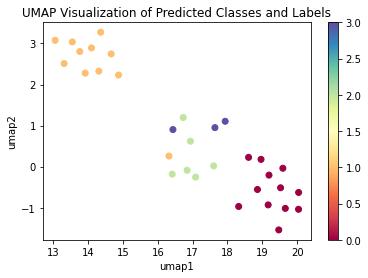

In [55]:
visualize_umap(model, test_loader)

/opt/conda/lib/python3.8/site-packages/skimage/filters/_unsharp_mask.py:11: FutureWarning: Automatic detection of the color channel was deprecated in v0.19, and `channel_axis=None` will be the new default in v0.22. Set `channel_axis=-1` explicitly to silence this warning.
  blurred = gaussian(image, sigma=radius, mode='reflect')


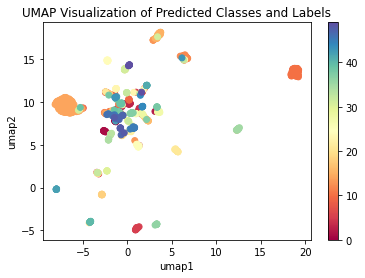

In [56]:
visualize_umap(model, test_loader, mode=2)

In [57]:
train_dataset = make_dataset('LFWCustom', split='train', max_classes=50, min_samples=20, image_size=100, median_unsharp=True)
test_dataset = make_dataset('LFWCustom', split='test', max_classes=50, min_samples=20, image_size=100, median_unsharp=True)
train_loader = load_dataset(train_dataset, batch_size, shuffle=True)
test_loader = load_dataset(test_dataset, batch_size, shuffle=False)
redefine_train_parameters()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


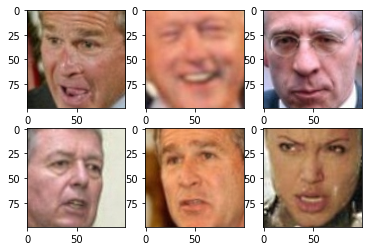

In [58]:
display_images(train_loader, h=2,w=3)

In [59]:
model = train_model(model_name='resnet50',
                    loss_func_name='proxy_anchor',
                    num_classes=num_classes,
                    dataloader=train_loader,
                    epochs=epochs,
                    learning_rate=learning_rate,
                    save_path='./saved_models/resnet50_lfw50_median-unsharp_proxy.ptm',
                    verbose=2)

Step: [10/53] Epoch [1/20] Loss: 1.8122 Time: 11.2243
Step: [20/53] Epoch [1/20] Loss: 3.4933 Time: 22.2676
Step: [30/53] Epoch [1/20] Loss: 5.1093 Time: 33.4133
Step: [40/53] Epoch [1/20] Loss: 6.6992 Time: 44.7663
Step: [50/53] Epoch [1/20] Loss: 8.2148 Time: 55.8649
Step: [53/53] Epoch [1/20] Loss: 8.6353 Time: 58.5163
Epoch [1/20] Loss: 8.6353 Time: 58.5167 Learning rate: 0.001
Step: [10/53] Epoch [2/20] Loss: 1.4142 Time: 69.5354
Step: [20/53] Epoch [2/20] Loss: 2.8043 Time: 80.7441
Step: [30/53] Epoch [2/20] Loss: 4.1655 Time: 91.7408
Step: [40/53] Epoch [2/20] Loss: 5.5636 Time: 102.8440
Step: [50/53] Epoch [2/20] Loss: 6.9604 Time: 113.8640
Step: [53/53] Epoch [2/20] Loss: 7.3474 Time: 116.6515
Epoch [2/20] Loss: 7.3474 Time: 116.6520 Learning rate: 0.001
Step: [10/53] Epoch [3/20] Loss: 1.3045 Time: 127.7015
Step: [20/53] Epoch [3/20] Loss: 2.5797 Time: 138.7447
Step: [30/53] Epoch [3/20] Loss: 3.8262 Time: 149.8228
Step: [40/53] Epoch [3/20] Loss: 5.0852 Time: 161.0818
Step: 

In [60]:
model = torch.load('./saved_models/resnet50_lfw50_median-unsharp_proxy.ptm')
# evaluate_accuracy(model, test_loader)

In [61]:
evaluate_cos(model, test_loader)

100%|██████████| 26/26 [00:26<00:00,  1.04s/it]


R@1 : 88.543
R@2 : 91.158
R@4 : 93.400
R@8 : 94.521
R@16 : 95.890
R@32 : 97.260


[0.8854296388542964,
 0.9115815691158157,
 0.933997509339975,
 0.9452054794520548,
 0.958904109589041,
 0.9726027397260274]

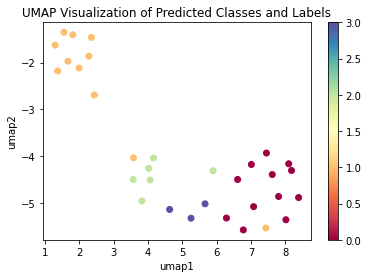

In [62]:
visualize_umap(model, test_loader)

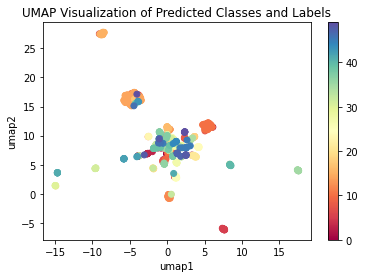

In [63]:
visualize_umap(model, test_loader, mode=2)

In [64]:
train_dataset = make_dataset('LFWCustom', split='train', max_classes=50, min_samples=20, image_size=100, median_unsharp=True, median=True)
test_dataset = make_dataset('LFWCustom', split='test', max_classes=50, min_samples=20, image_size=100, median_unsharp=True, median=True)
train_loader = load_dataset(train_dataset, batch_size, shuffle=True)
test_loader = load_dataset(test_dataset, batch_size, shuffle=False)
redefine_train_parameters()

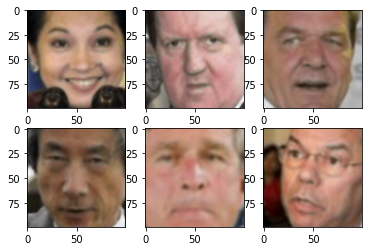

In [65]:
display_images(train_loader, h=2,w=3)

In [66]:
model = train_model(model_name='resnet50',
                    loss_func_name='proxy_anchor',
                    num_classes=num_classes,
                    dataloader=train_loader,
                    epochs=epochs,
                    learning_rate=learning_rate,
                    save_path='./saved_models/resnet50_lfw50_median-unsharp_median_proxy.ptm',
                    verbose=2)

Step: [10/53] Epoch [1/20] Loss: 1.7989 Time: 14.3559
Step: [20/53] Epoch [1/20] Loss: 3.5185 Time: 28.5250
Step: [30/53] Epoch [1/20] Loss: 5.1862 Time: 42.8778
Step: [40/53] Epoch [1/20] Loss: 6.8304 Time: 56.9737
Step: [50/53] Epoch [1/20] Loss: 8.3695 Time: 71.0807
Step: [53/53] Epoch [1/20] Loss: 8.7853 Time: 74.3819
Epoch [1/20] Loss: 8.7853 Time: 74.3822 Learning rate: 0.001
Step: [10/53] Epoch [2/20] Loss: 1.4440 Time: 88.7206
Step: [20/53] Epoch [2/20] Loss: 2.8778 Time: 102.9317
Step: [30/53] Epoch [2/20] Loss: 4.2755 Time: 117.2604
Step: [40/53] Epoch [2/20] Loss: 5.6586 Time: 131.4291
Step: [50/53] Epoch [2/20] Loss: 7.0741 Time: 145.5857
Step: [53/53] Epoch [2/20] Loss: 7.4522 Time: 148.8796
Epoch [2/20] Loss: 7.4522 Time: 148.8803 Learning rate: 0.001
Step: [10/53] Epoch [3/20] Loss: 1.3159 Time: 163.1409
Step: [20/53] Epoch [3/20] Loss: 2.6483 Time: 177.2058
Step: [30/53] Epoch [3/20] Loss: 3.9363 Time: 191.4682
Step: [40/53] Epoch [3/20] Loss: 5.1627 Time: 205.5648
Step

In [67]:
model = torch.load('./saved_models/resnet50_lfw50_median-unsharp_median_proxy.ptm')
# evaluate_accuracy(model, test_loader)

In [68]:
evaluate_cos(model, test_loader)

100%|██████████| 26/26 [00:34<00:00,  1.34s/it]


R@1 : 90.411
R@2 : 92.403
R@4 : 93.524
R@8 : 94.770
R@16 : 95.890
R@32 : 97.634


[0.9041095890410958,
 0.9240348692403487,
 0.9352428393524284,
 0.9476961394769614,
 0.958904109589041,
 0.9763387297633873]

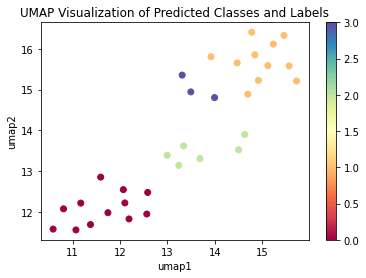

In [69]:
visualize_umap(model, test_loader)

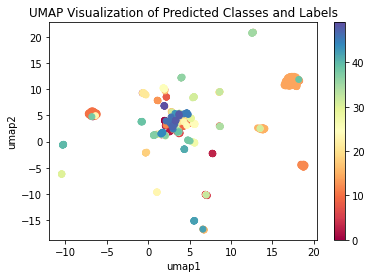

In [70]:
visualize_umap(model, test_loader, mode=2)

In [29]:
train_dataset = make_dataset('LFWCustom', split='train', max_classes=50, min_samples=20, image_size=100, adjust_log=True)
test_dataset = make_dataset('LFWCustom', split='test', max_classes=50, min_samples=20, image_size=100, adjust_log=True)
train_loader = load_dataset(train_dataset, batch_size, shuffle=True)
test_loader = load_dataset(test_dataset, batch_size, shuffle=False)
redefine_train_parameters()

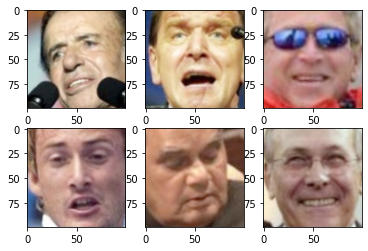

In [30]:
display_images(train_loader, h=2,w=3)

In [31]:
model = train_model(model_name='resnet50',
                    loss_func_name='proxy_anchor',
                    num_classes=num_classes,
                    dataloader=train_loader,
                    epochs=epochs,
                    learning_rate=learning_rate,
                    save_path='./saved_models/resnet50_lfw50_adjust-log_proxy.ptm',
                    verbose=2)

Step: [10/53] Epoch [1/20] Loss: 1.8388 Time: 9.8179
Step: [20/53] Epoch [1/20] Loss: 3.5766 Time: 19.5204
Step: [30/53] Epoch [1/20] Loss: 5.1662 Time: 29.1960
Step: [40/53] Epoch [1/20] Loss: 6.7392 Time: 38.7711
Step: [50/53] Epoch [1/20] Loss: 8.3267 Time: 48.3590
Step: [53/53] Epoch [1/20] Loss: 8.7921 Time: 50.7950
Epoch [1/20] Loss: 8.7921 Time: 50.7954 Learning rate: 0.001
Step: [10/53] Epoch [2/20] Loss: 1.4378 Time: 60.3992
Step: [20/53] Epoch [2/20] Loss: 2.8206 Time: 70.0104
Step: [30/53] Epoch [2/20] Loss: 4.2904 Time: 79.6748
Step: [40/53] Epoch [2/20] Loss: 5.6766 Time: 89.5048
Step: [50/53] Epoch [2/20] Loss: 7.0422 Time: 99.1492
Step: [53/53] Epoch [2/20] Loss: 7.3891 Time: 101.3625
Epoch [2/20] Loss: 7.3891 Time: 101.3629 Learning rate: 0.001
Step: [10/53] Epoch [3/20] Loss: 1.2958 Time: 110.9913
Step: [20/53] Epoch [3/20] Loss: 2.5619 Time: 120.6420
Step: [30/53] Epoch [3/20] Loss: 3.7859 Time: 130.4508
Step: [40/53] Epoch [3/20] Loss: 5.0898 Time: 140.0305
Step: [50

In [32]:
model = torch.load('./saved_models/resnet50_lfw50_adjust-log_proxy.ptm')
# evaluate_accuracy(model, test_loader)

In [33]:
evaluate_cos(model, test_loader)

100%|██████████| 26/26 [00:23<00:00,  1.12it/s]


R@1 : 89.788
R@2 : 92.154
R@4 : 93.898
R@8 : 94.770
R@16 : 96.638
R@32 : 97.883


[0.8978829389788294,
 0.9215442092154421,
 0.9389788293897883,
 0.9476961394769614,
 0.9663760896637609,
 0.9788293897882939]

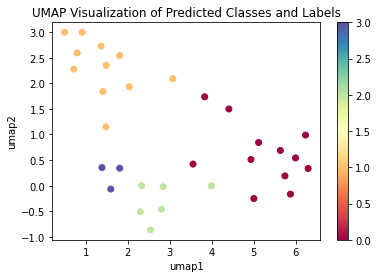

In [34]:
visualize_umap(model, test_loader)

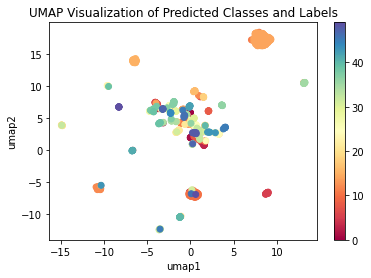

In [35]:
visualize_umap(model, test_loader, mode=2)

In [78]:
train_dataset = make_dataset('LFWCustom', split='train', max_classes=50, min_samples=20, image_size=100, median=True, adjust_log_before=True)
test_dataset = make_dataset('LFWCustom', split='test', max_classes=50, min_samples=20, image_size=100, median=True, adjust_log_before=True)
train_loader = load_dataset(train_dataset, batch_size, shuffle=True)
test_loader = load_dataset(test_dataset, batch_size, shuffle=False)
redefine_train_parameters()

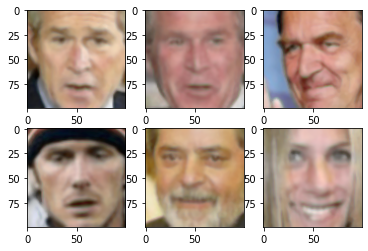

In [79]:
display_images(train_loader, h=2,w=3)

In [80]:
model = train_model(model_name='resnet50',
                    loss_func_name='proxy_anchor',
                    num_classes=num_classes,
                    dataloader=train_loader,
                    epochs=epochs,
                    learning_rate=learning_rate,
                    save_path='./saved_models/resnet50_lfw50_adjust-log_median_proxy.ptm',
                    verbose=2)

Step: [10/53] Epoch [1/20] Loss: 1.8674 Time: 12.5431
Step: [20/53] Epoch [1/20] Loss: 3.5868 Time: 25.0487
Step: [30/53] Epoch [1/20] Loss: 5.2616 Time: 37.8368
Step: [40/53] Epoch [1/20] Loss: 6.9216 Time: 50.4383
Step: [50/53] Epoch [1/20] Loss: 8.5227 Time: 62.9992
Step: [53/53] Epoch [1/20] Loss: 8.9698 Time: 65.9312
Epoch [1/20] Loss: 8.9698 Time: 65.9316 Learning rate: 0.001
Step: [10/53] Epoch [2/20] Loss: 1.4922 Time: 78.6751
Step: [20/53] Epoch [2/20] Loss: 2.9229 Time: 91.2552
Step: [30/53] Epoch [2/20] Loss: 4.3919 Time: 103.8819
Step: [40/53] Epoch [2/20] Loss: 5.8069 Time: 116.6129
Step: [50/53] Epoch [2/20] Loss: 7.2042 Time: 129.0639
Step: [53/53] Epoch [2/20] Loss: 7.6269 Time: 131.9840
Epoch [2/20] Loss: 7.6269 Time: 131.9844 Learning rate: 0.001
Step: [10/53] Epoch [3/20] Loss: 1.3389 Time: 144.5344
Step: [20/53] Epoch [3/20] Loss: 2.6440 Time: 157.2650
Step: [30/53] Epoch [3/20] Loss: 3.9964 Time: 169.8661
Step: [40/53] Epoch [3/20] Loss: 5.3186 Time: 182.4492
Step:

In [81]:
model = torch.load('./saved_models/resnet50_lfw50_adjust-log_median_proxy.ptm')
# evaluate_accuracy(model, test_loader)

In [82]:
evaluate_cos(model, test_loader)

100%|██████████| 26/26 [00:31<00:00,  1.19s/it]


R@1 : 88.045
R@2 : 90.909
R@4 : 92.653
R@8 : 94.147
R@16 : 95.766
R@32 : 97.634


[0.8804483188044832,
 0.9090909090909091,
 0.9265255292652553,
 0.9414694894146949,
 0.9576587795765878,
 0.9763387297633873]

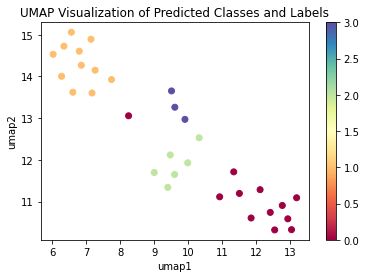

In [83]:
visualize_umap(model, test_loader)

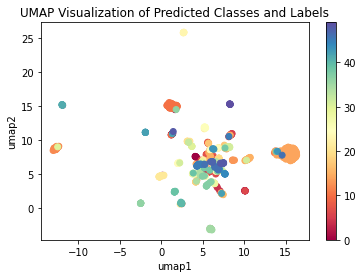

In [84]:
visualize_umap(model, test_loader, mode=2)

In [8]:
train_dataset = make_dataset('LFWCustom', split='train', max_classes=50, min_samples=20, image_size=100, unsharp=True, adjust_log=True)
test_dataset = make_dataset('LFWCustom', split='test', max_classes=50, min_samples=20, image_size=100, unsharp=True, adjust_log=True)
train_loader = load_dataset(train_dataset, batch_size, shuffle=True)
test_loader = load_dataset(test_dataset, batch_size, shuffle=False)
redefine_train_parameters()

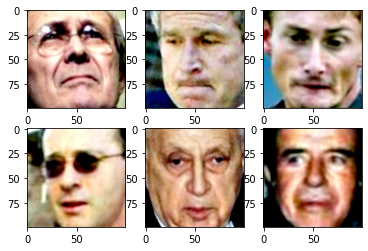

In [9]:
display_images(train_loader, h=2,w=3)

In [10]:
model = train_model(model_name='resnet50',
                    loss_func_name='proxy_anchor',
                    num_classes=num_classes,
                    dataloader=train_loader,
                    epochs=epochs,
                    learning_rate=learning_rate,
                    save_path='./saved_models/resnet50_lfw50_unsharp_adjust-log_proxy.ptm',
                    verbose=2)

Step: [10/53] Epoch [1/20] Loss: 1.8373 Time: 11.3912
Step: [20/53] Epoch [1/20] Loss: 3.5252 Time: 22.3058
Step: [30/53] Epoch [1/20] Loss: 5.1681 Time: 33.4387
Step: [40/53] Epoch [1/20] Loss: 6.7315 Time: 44.3564
Step: [50/53] Epoch [1/20] Loss: 8.2535 Time: 55.3077
Step: [53/53] Epoch [1/20] Loss: 8.6354 Time: 57.8446
Epoch [1/20] Loss: 8.6354 Time: 57.8454 Learning rate: 0.001
Step: [10/53] Epoch [2/20] Loss: 1.3943 Time: 69.2657
Step: [20/53] Epoch [2/20] Loss: 2.7569 Time: 80.2519
Step: [30/53] Epoch [2/20] Loss: 4.1049 Time: 91.2029
Step: [40/53] Epoch [2/20] Loss: 5.4417 Time: 102.2873
Step: [50/53] Epoch [2/20] Loss: 6.7872 Time: 113.4163
Step: [53/53] Epoch [2/20] Loss: 7.1468 Time: 115.9806
Epoch [2/20] Loss: 7.1468 Time: 115.9811 Learning rate: 0.001
Step: [10/53] Epoch [3/20] Loss: 1.2099 Time: 126.9535
Step: [20/53] Epoch [3/20] Loss: 2.4286 Time: 137.9989
Step: [30/53] Epoch [3/20] Loss: 3.6547 Time: 149.1951
Step: [40/53] Epoch [3/20] Loss: 4.8370 Time: 160.1816
Step: 

In [11]:
model = torch.load('./saved_models/resnet50_lfw50_unsharp_adjust-log_proxy.ptm')
# evaluate_accuracy(model, test_loader)

In [12]:
evaluate_cos(model, test_loader)

100%|██████████| 26/26 [00:26<00:00,  1.03s/it]


R@1 : 89.166
R@2 : 92.030
R@4 : 93.649
R@8 : 95.019
R@16 : 96.389
R@32 : 98.007


[0.8916562889165629,
 0.9202988792029888,
 0.9364881693648817,
 0.950186799501868,
 0.9638854296388543,
 0.9800747198007472]

OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


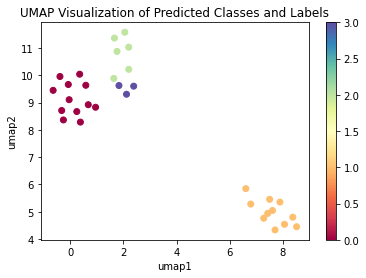

In [13]:
visualize_umap(model, test_loader)

/opt/conda/lib/python3.8/site-packages/skimage/filters/_unsharp_mask.py:11: FutureWarning: Automatic detection of the color channel was deprecated in v0.19, and `channel_axis=None` will be the new default in v0.22. Set `channel_axis=-1` explicitly to silence this warning.
  blurred = gaussian(image, sigma=radius, mode='reflect')


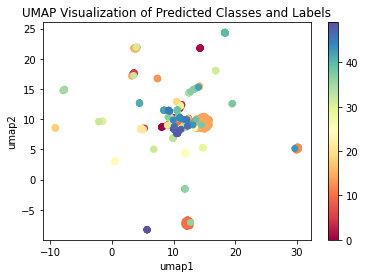

In [14]:
visualize_umap(model, test_loader, mode=2)

In [15]:
train_dataset = make_dataset('LFWCustom', split='train', max_classes=50, min_samples=20, image_size=100, custom=True)
test_dataset = make_dataset('LFWCustom', split='test', max_classes=50, min_samples=20, image_size=100, custom=True)
train_loader = load_dataset(train_dataset, batch_size, shuffle=True)
test_loader = load_dataset(test_dataset, batch_size, shuffle=False)
redefine_train_parameters()

/opt/conda/lib/python3.8/site-packages/skimage/filters/_unsharp_mask.py:11: FutureWarning: Automatic detection of the color channel was deprecated in v0.19, and `channel_axis=None` will be the new default in v0.22. Set `channel_axis=-1` explicitly to silence this warning.
  blurred = gaussian(image, sigma=radius, mode='reflect')
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


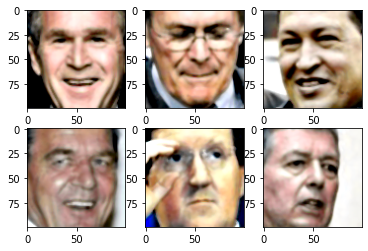

In [16]:
display_images(train_loader, h=2,w=3)

In [17]:
model = train_model(model_name='resnet50',
                    loss_func_name='proxy_anchor',
                    num_classes=num_classes,
                    dataloader=train_loader,
                    epochs=epochs,
                    learning_rate=learning_rate,
                    save_path='./saved_models/resnet50_lfw50_unsharp_adjust-log_median-unsharp_median_proxy.ptm',
                    verbose=2)

Step: [10/53] Epoch [1/20] Loss: 1.8746 Time: 15.6548
Step: [20/53] Epoch [1/20] Loss: 3.5736 Time: 31.4854
Step: [30/53] Epoch [1/20] Loss: 5.2672 Time: 47.1184
Step: [40/53] Epoch [1/20] Loss: 6.8400 Time: 62.8946
Step: [50/53] Epoch [1/20] Loss: 8.3776 Time: 78.3815
Step: [53/53] Epoch [1/20] Loss: 8.7985 Time: 81.9659
Epoch [1/20] Loss: 8.7985 Time: 81.9661 Learning rate: 0.001
Step: [10/53] Epoch [2/20] Loss: 1.4092 Time: 97.4743
Step: [20/53] Epoch [2/20] Loss: 2.7951 Time: 113.0996
Step: [30/53] Epoch [2/20] Loss: 4.2120 Time: 128.5667
Step: [40/53] Epoch [2/20] Loss: 5.4978 Time: 144.2389
Step: [50/53] Epoch [2/20] Loss: 6.8894 Time: 159.6791
Step: [53/53] Epoch [2/20] Loss: 7.3175 Time: 163.2736
Epoch [2/20] Loss: 7.3175 Time: 163.2739 Learning rate: 0.001
Step: [10/53] Epoch [3/20] Loss: 1.2314 Time: 178.9639
Step: [20/53] Epoch [3/20] Loss: 2.4458 Time: 194.4245
Step: [30/53] Epoch [3/20] Loss: 3.6337 Time: 209.8518
Step: [40/53] Epoch [3/20] Loss: 4.8315 Time: 225.6200
Step

In [18]:
model = torch.load('./saved_models/resnet50_lfw50_unsharp_adjust-log_median-unsharp_median_proxy.ptm')
# evaluate_accuracy(model, test_loader)

In [19]:
evaluate_cos(model, test_loader)

100%|██████████| 26/26 [00:38<00:00,  1.49s/it]


R@1 : 88.792
R@2 : 91.034
R@4 : 92.279
R@8 : 93.151
R@16 : 95.766
R@32 : 97.634


[0.887920298879203,
 0.9103362391033624,
 0.9227895392278954,
 0.9315068493150684,
 0.9576587795765878,
 0.9763387297633873]

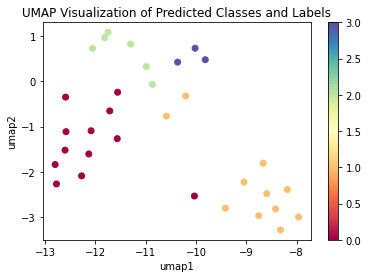

In [20]:
visualize_umap(model, test_loader)

/opt/conda/lib/python3.8/site-packages/skimage/filters/_unsharp_mask.py:11: FutureWarning: Automatic detection of the color channel was deprecated in v0.19, and `channel_axis=None` will be the new default in v0.22. Set `channel_axis=-1` explicitly to silence this warning.
  blurred = gaussian(image, sigma=radius, mode='reflect')


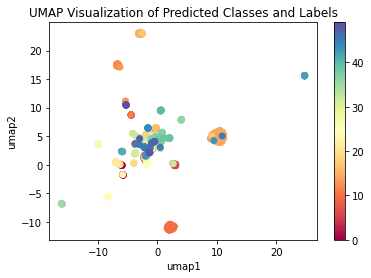

In [21]:
visualize_umap(model, test_loader, mode=2)

In [3]:
train_dataset = make_dataset('LFWCustom', split='train', max_classes=50, min_samples=20, image_size=100, custom2=True)
test_dataset = make_dataset('LFWCustom', split='test', max_classes=50, min_samples=20, image_size=100, custom2=True)
train_loader = load_dataset(train_dataset, batch_size, shuffle=True)
test_loader = load_dataset(test_dataset, batch_size, shuffle=False)
redefine_train_parameters()

/opt/conda/lib/python3.8/site-packages/skimage/filters/_unsharp_mask.py:11: FutureWarning: Automatic detection of the color channel was deprecated in v0.19, and `channel_axis=None` will be the new default in v0.22. Set `channel_axis=-1` explicitly to silence this warning.
  blurred = gaussian(image, sigma=radius, mode='reflect')


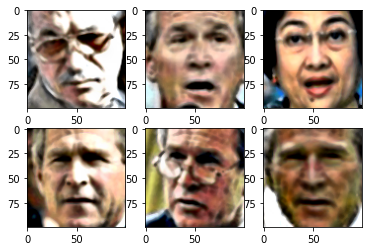

In [4]:
display_images(train_loader, h=2,w=3)

In [5]:
model = train_model(model_name='resnet50',
                    loss_func_name='proxy_anchor',
                    num_classes=num_classes,
                    dataloader=train_loader,
                    epochs=epochs,
                    learning_rate=learning_rate,
                    save_path='./saved_models/resnet50_lfw50_unsharp_median_adapthist_proxy.ptm',
                    verbose=2)

Step: [10/53] Epoch [1/20] Loss: 1.8783 Time: 18.2958
Step: [20/53] Epoch [1/20] Loss: 3.5819 Time: 34.8106
Step: [30/53] Epoch [1/20] Loss: 5.2387 Time: 51.1152
Step: [40/53] Epoch [1/20] Loss: 6.7596 Time: 67.6385
Step: [50/53] Epoch [1/20] Loss: 8.2770 Time: 83.8807
Step: [53/53] Epoch [1/20] Loss: 8.6854 Time: 87.7206
Epoch [1/20] Loss: 8.6854 Time: 87.7210 Learning rate: 0.001
Step: [10/53] Epoch [2/20] Loss: 1.3758 Time: 104.2095
Step: [20/53] Epoch [2/20] Loss: 2.7257 Time: 120.4546
Step: [30/53] Epoch [2/20] Loss: 4.0354 Time: 136.8593
Step: [40/53] Epoch [2/20] Loss: 5.3349 Time: 153.2942
Step: [50/53] Epoch [2/20] Loss: 6.6685 Time: 169.4438
Step: [53/53] Epoch [2/20] Loss: 7.0126 Time: 173.1951
Epoch [2/20] Loss: 7.0126 Time: 173.1961 Learning rate: 0.001
Step: [10/53] Epoch [3/20] Loss: 1.2055 Time: 189.6134
Step: [20/53] Epoch [3/20] Loss: 2.4727 Time: 205.8724
Step: [30/53] Epoch [3/20] Loss: 3.6918 Time: 222.3434
Step: [40/53] Epoch [3/20] Loss: 4.9218 Time: 238.6599
Ste

In [6]:
model = torch.load('./saved_models/resnet50_lfw50_unsharp_median_adapthist_proxy.ptm')
# evaluate_accuracy(model, test_loader)

In [7]:
evaluate_cos(model, test_loader)

100%|██████████| 26/26 [00:40<00:00,  1.55s/it]


R@1 : 89.788
R@2 : 91.407
R@4 : 92.030
R@8 : 93.026
R@16 : 95.268
R@32 : 96.887


[0.8978829389788294,
 0.9140722291407223,
 0.9202988792029888,
 0.9302615193026152,
 0.9526774595267746,
 0.9688667496886675]

OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


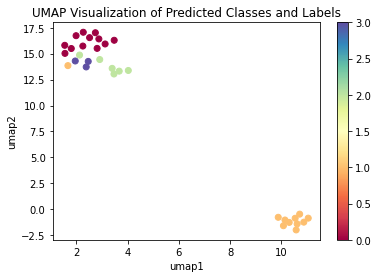

In [8]:
visualize_umap(model, test_loader)

/opt/conda/lib/python3.8/site-packages/skimage/filters/_unsharp_mask.py:11: FutureWarning: Automatic detection of the color channel was deprecated in v0.19, and `channel_axis=None` will be the new default in v0.22. Set `channel_axis=-1` explicitly to silence this warning.
  blurred = gaussian(image, sigma=radius, mode='reflect')


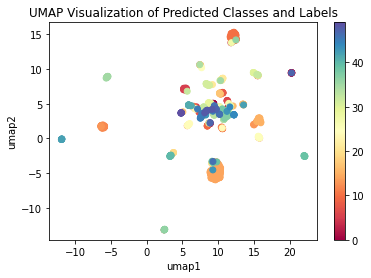

In [9]:
visualize_umap(model, test_loader, mode=2)